<a href="https://colab.research.google.com/github/ds4439/ibm-internship/blob/main/Superstore%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('/content/SampleSuperstore.csv')  # Replace 'superstore_dataset.csv' with your dataset file name and path
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# Perform exploratory data analysis (EDA)
# Example: Display summary statistics
print(df.describe())


        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [ ]:
# Example: Count the number of rows and columns in the dataset
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 9994
Number of columns: 13


In [ ]:
# Example: Calculate the total sales
total_sales = df['Sales'].sum()
print(f"Total sales: ${total_sales}")

Total sales: $2297200.8603000003


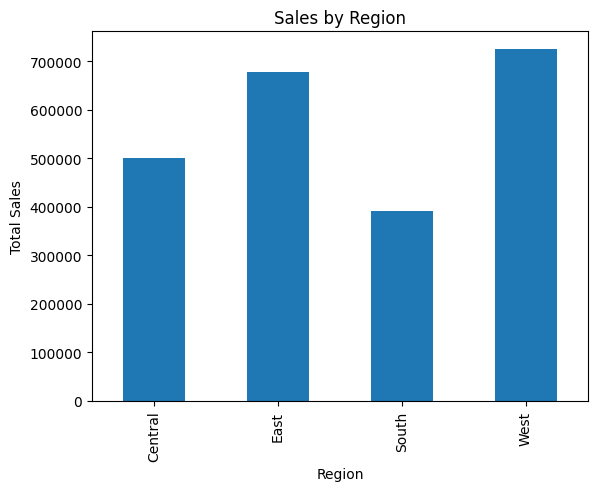

In [ ]:
# Example: Visualize sales by region using a bar chart
import matplotlib.pyplot as plt

sales_by_region = df.groupby('Region')['Sales'].sum()
sales_by_region.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
print(df.isnull().sum())


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


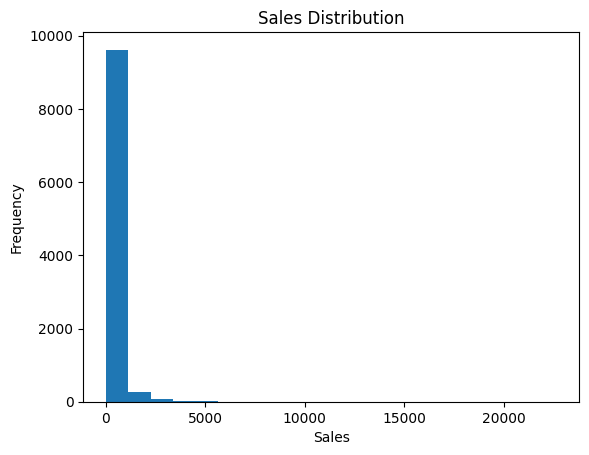

In [ ]:
#Visualize the distribution of a numerical column using a histogram:
plt.hist(df['Sales'], bins=20)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


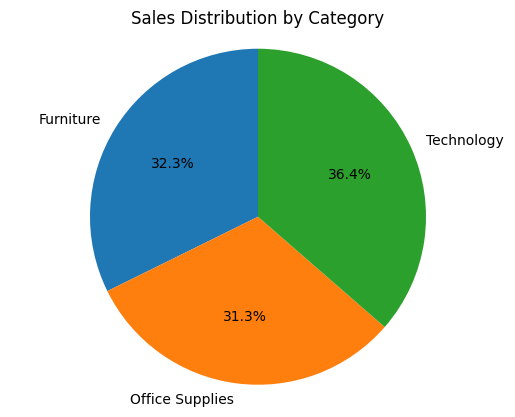

In [ ]:
# Calculate the total sales by category
sales_by_category = df.groupby('Category')['Sales'].sum()

# Plot the sales distribution using a pie chart
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Category')
plt.axis('equal')
plt.show()


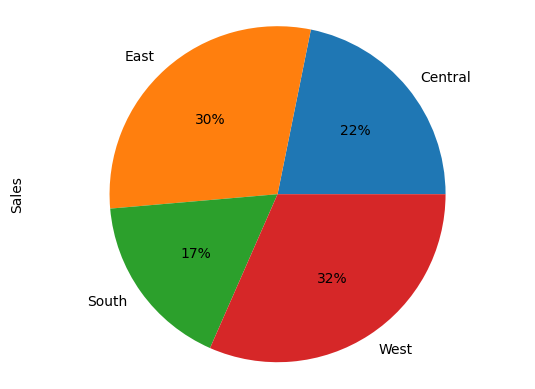

In [17]:
import matplotlib.pyplot as plt

sales_by_region = df.groupby("Region")["Sales"].sum()
sales_by_region.plot.pie(autopct="%1.0f%%")

plt.axis("equal")
plt.show()


In [ ]:
#Calculate the average sales per category:
avg_sales_by_category = df.groupby('Category')['Sales'].mean()
print(avg_sales_by_category)


Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64


In [ ]:
#Calculate the total profit by sub-category and sort in descending order:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
print(profit_by_subcategory)


Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64


In [ ]:
#Filter the dataset based on specific conditions (e.g., sales greater than a threshold):
filtered_df = df[df['Sales'] > 1000]
print(filtered_df.head())


         Ship Mode    Segment        Country           City         State  \
10  Standard Class   Consumer  United States    Los Angeles    California   
24  Standard Class   Consumer  United States           Orem          Utah   
27  Standard Class   Consumer  United States   Philadelphia  Pennsylvania   
35     First Class  Corporate  United States     Richardson         Texas   
54  Standard Class  Corporate  United States  New York City      New York   

    Postal Code   Region    Category Sub-Category     Sales  Quantity  \
10        90032     West   Furniture       Tables  1706.184         9   
24        84057     West   Furniture       Tables  1044.630         3   
27        19140     East   Furniture    Bookcases  3083.430         7   
35        75080  Central  Technology       Phones  1097.544         7   
54        10024     East  Technology       Phones  1029.950         5   

    Discount     Profit  
10       0.2    85.3092  
24       0.0   240.2649  
27       0.5 -1665.0

In [ ]:
#Create a correlation matrix to explore the relationships between numerical columns:
correlation_matrix = df.corr()
print(correlation_matrix)


             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000


<ipython-input-14-523ababa51f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


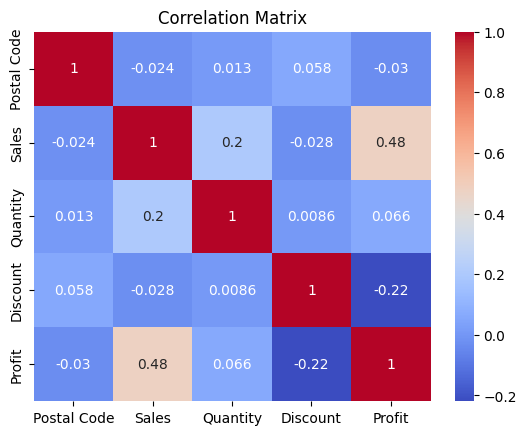

In [ ]:
#Visualize the correlation matrix using a heatmap
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
